# Process Tabular Data with Pandas

In this notebook you will:

* Load a data from a scan.
* Visualize it.
* Explore the dataset, performing basic filtering and statistic operations using ``pandas``.

Recommended Prerequisites:

* [Hello Bluesky](./Hello%20Bluesky.ipynb)

## Configuration
Below, we will connect to EPICS IOC(s) controlling simulated hardware in lieu of actual motors, detectors. The IOCs should already be running in the background. Run this command to verify that they are running: it should produce output with RUNNING on each line. In the event of a problem, edit this command to replace status with restart all and run again.


In [1]:
!supervisorctl -c supervisor/supervisord.conf status

decay                            RUNNING   pid 4928, uptime 0:03:38
mini_beamline                    RUNNING   pid 4929, uptime 0:03:38
random_walk                      RUNNING   pid 4930, uptime 0:03:38
random_walk_horiz                RUNNING   pid 4931, uptime 0:03:38
random_walk_vert                 RUNNING   pid 4932, uptime 0:03:38
simple                           RUNNING   pid 4933, uptime 0:03:38
thermo_sim                       RUNNING   pid 4934, uptime 0:03:38
trigger_with_pc                  RUNNING   pid 4935, uptime 0:03:38


In [2]:
%run scripts/beamline_configuration.py

## Quickly access and explore the data

Let's take sample data.

In [3]:
# Creating a figure explicitly in advance helps with the
# top-to-bottom flow of this notebook, but it is not necessary.
# If this is omitted, bluesky will cause a figure to appear
# during the RE(...) execution below.
plt.figure('I slit_det vs motor_slit')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

<Figure size 640x480 with 0 Axes>

In [4]:
RE(scan([slit, I], motor_slit, -10, 10, 15))



Transient Scan ID: 26     Time: 2020-06-11 20:15:46
Persistent Unique Scan ID: '20276e1e-6eec-4223-82fe-04ebdf3544e2'


New stream: 'primary'
+-----------+------------+------------+------------+------------+
|   seq_num |       time | motor_slit |   slit_det |          I |
+-----------+------------+------------+------------+------------+
|         1 | 20:15:46.8 |    -10.000 |       7884 |        511 |
|         2 | 20:15:46.8 |     -8.571 |      27092 |        503 |
|         3 | 20:15:46.9 |     -7.143 |      58363 |        503 |


/home/travis/virtualenv/python3.7.1/lib/python3.7/site-packages/bluesky/utils.py:1502: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  f_mgr.canvas.draw()


|         4 | 20:15:46.9 |     -5.714 |      84731 |        500 |
|         5 | 20:15:47.0 |     -4.286 |      96685 |        500 |
|         6 | 20:15:47.0 |     -2.857 |      99816 |        500 |
|         7 | 20:15:47.0 |     -1.429 |      99413 |        496 |
|         8 | 20:15:47.0 |      0.000 |      99140 |        496 |
|         9 | 20:15:47.1 |      1.429 |      98502 |        496 |
|        10 | 20:15:47.1 |      2.857 |      98467 |        496 |
|        11 | 20:15:47.1 |      4.286 |      95749 |        496 |
|        12 | 20:15:47.1 |      5.714 |      83378 |        496 |
|        13 | 20:15:47.1 |      7.143 |      57500 |        496 |
|        14 | 20:15:47.1 |      8.571 |      26792 |        496 |


|        15 | 20:15:47.2 |     10.000 |       7689 |        492 |
+-----------+------------+------------+------------+------------+
generator scan ['20276e1e'] (scan num: 26)





('20276e1e-6eec-4223-82fe-04ebdf3544e2',)

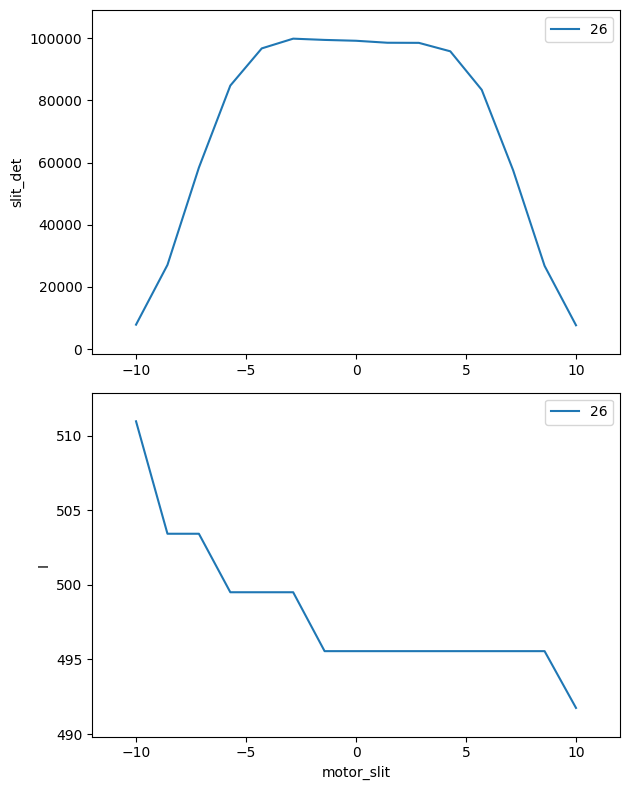

In [5]:
plt.gcf()  # Display a snapshot of the current state of the figure.

Previously we used the syntax ``db(...)`` to search for Headers. We looped through each Header and extracted some of the metadata encapsulated in it. We use the shorthand ``db[-N]`` to retrieve exactly _one_ header, the one corresponding to ``N`` runs ago. 

In [6]:
header = db[-1]  # Header for the most recent one (i.e. 1 run ago)

We can access the data as a table. This object is called a ``pandas.DataFrame``, a high-performance, spreadsheet-like object in Python.

In [7]:
data = header.table()

It display prettily, truncating if needed.

In [8]:
data

,time,slit_det,I,motor_slit
seq_num,,,,
1,2020-06-11 20:15:46.844021320,7884.0,510.951904,-10.000000
2,2020-06-11 20:15:46.892642736,27092.0,503.419306,-8.571429
3,2020-06-11 20:15:46.935467720,58363.0,503.419306,-7.142857
4,2020-06-11 20:15:46.993109703,84731.0,499.500370,-5.714286
5,2020-06-11 20:15:47.042906284,96685.0,499.500370,-4.285714
6,2020-06-11 20:15:47.072415590,99816.0,499.500370,-2.857143
7,2020-06-11 20:15:47.083404064,99413.0,495.554415,-1.428571
8,2020-06-11 20:15:47.094187260,99140.0,495.554415,0.000000
9,2020-06-11 20:15:47.104897738,98502.0,495.554415,1.428571


For large tables, it's handy to know how to ask for just the first or last couple rows.

It is easy to visualize.

In [9]:
data.plot(x='motor_slit', y='slit_det')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

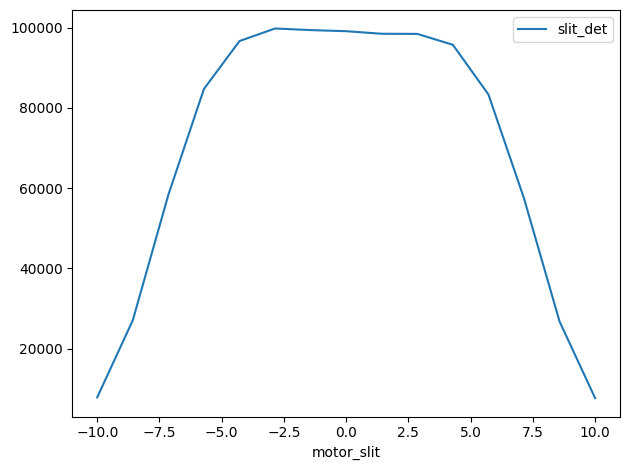

In [10]:
plt.gcf()  # Display a snapshot of the current state of the figure.

In [11]:
data.head()

,time,slit_det,I,motor_slit
seq_num,,,,
1,2020-06-11 20:15:46.844021320,7884.0,510.951904,-10.000000
2,2020-06-11 20:15:46.892642736,27092.0,503.419306,-8.571429
3,2020-06-11 20:15:46.935467720,58363.0,503.419306,-7.142857
4,2020-06-11 20:15:46.993109703,84731.0,499.500370,-5.714286
5,2020-06-11 20:15:47.042906284,96685.0,499.500370,-4.285714


In [12]:
data.tail()

,time,slit_det,I,motor_slit
seq_num,,,,
11,2020-06-11 20:15:47.126951694,95749.0,495.554415,4.285714
12,2020-06-11 20:15:47.137780190,83378.0,495.554415,5.714286
13,2020-06-11 20:15:47.148929834,57500.0,495.554415,7.142857
14,2020-06-11 20:15:47.159748077,26792.0,495.554415,8.571429
15,2020-06-11 20:15:47.223444939,7689.0,491.750866,10.000000


Statistics on columns are simple to compute.

In [13]:
data.mean()

slit_det      6.941340e+04
I             4.981652e+02
motor_slit    4.736952e-16
dtype: float64

In [14]:
data.min()

time          2020-06-11 20:15:46.844021320
slit_det                               7689
I                                   491.751
motor_slit                              -10
dtype: object

Or just ask for all the common stats at once:

In [15]:
data.describe()

,slit_det,I,motor_slit
count,15.000000,15.000000,1.500000e+01
mean,69413.400000,498.165188,4.736952e-16
std,35589.584923,4.778915,6.388766e+00
min,7689.000000,491.750866,-1.000000e+01
25%,42296.000000,495.554415,-5.000000e+00
50%,84731.000000,495.554415,0.000000e+00
75%,98484.500000,499.500370,5.000000e+00
max,99816.000000,510.951904,1.000000e+01


## Do analysis, and plot

### Normalize by beam current

We can do math on the columns, and we can add new columns.

In [16]:
data['normalized'] = data['slit_det'] / data['I'] * data['I'].mean()

We can plot them conveniently, addressing the columns by name.

In [17]:
plt.figure()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

<Figure size 640x480 with 0 Axes>

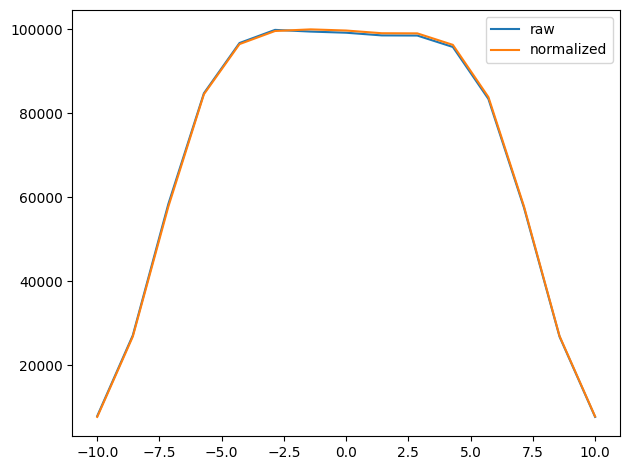

In [18]:
plt.plot('motor_slit', 'slit_det', data=data, label='raw')
plt.plot('motor_slit', 'normalized', data=data, label='normalized')
plt.legend()
plt.gcf()

### Select only rows with high beam current

Select rows where the current is above `500`.

In [19]:
data[data['I'] > 500]

,time,slit_det,I,motor_slit,normalized
seq_num,,,,,
1,2020-06-11 20:15:46.844021320,7884.0,510.951904,-10.000000,7686.700669
2,2020-06-11 20:15:46.892642736,27092.0,503.419306,-8.571429,26809.244487
3,2020-06-11 20:15:46.935467720,58363.0,503.419306,-7.142857,57753.873320


...or, where the the current is above the 30th percentile.

In [20]:
data[data['I'] > data['I'].quantile(0.30)]

,time,slit_det,I,motor_slit,normalized
seq_num,,,,,
1,2020-06-11 20:15:46.844021320,7884.0,510.951904,-10.000000,7686.700669
2,2020-06-11 20:15:46.892642736,27092.0,503.419306,-8.571429,26809.244487
3,2020-06-11 20:15:46.935467720,58363.0,503.419306,-7.142857,57753.873320
4,2020-06-11 20:15:46.993109703,84731.0,499.500370,-5.714286,84504.511041
5,2020-06-11 20:15:47.042906284,96685.0,499.500370,-4.285714,96426.557576
6,2020-06-11 20:15:47.072415590,99816.0,499.500370,-2.857143,99549.188302


...and plot just those rows, using a marker so it is easy to see which points have been disqualified due to low current.

In [21]:
data[data['I'] > data['I'].quantile(0.30)].plot(x='motor_slit', y='slit_det', marker='o')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

### Histogram the current

In [22]:
plt.figure()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

<Figure size 640x480 with 0 Axes>

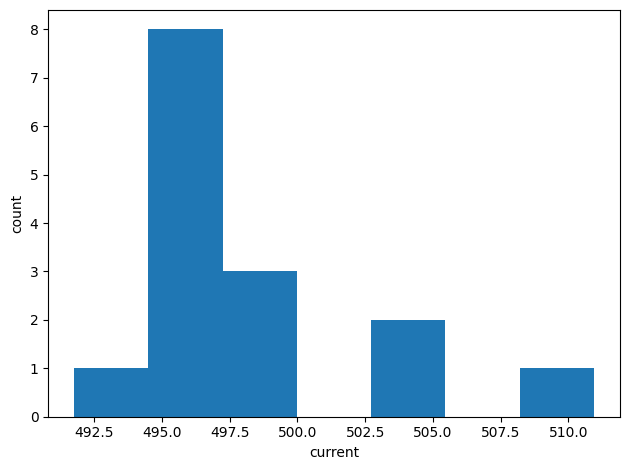

In [23]:
plt.hist(data['I'], bins='auto')
plt.xlabel('current')
plt.ylabel('count')
plt.gcf()

Not enough data to be interesting. Try collecting a bunch of current data by itself and then try this again.

In [24]:
# Creating a figure explicitly in advance helps with the
# top-to-bottom flow of this notebook, but it is not necessary.
# If this is omitted, bluesky will cause a figure to appear
# during the RE(...) execution below.
plt.figure("I vs time")

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

<Figure size 640x480 with 0 Axes>

In [25]:
RE(count([I], num=200, delay=0.1))



Transient Scan ID: 27     Time: 2020-06-11 20:15:49
Persistent Unique Scan ID: 'f8936275-69b6-4344-a3dd-44c71bf141f4'
New stream: 'primary'
+-----------+------------+------------+
|   seq_num |       time |          I |
+-----------+------------+------------+
|         1 | 20:15:49.4 |        512 |
|         2 | 20:15:49.5 |        518 |


|         3 | 20:15:49.5 |        521 |
|         4 | 20:15:49.7 |        523 |


|         5 | 20:15:49.8 |        524 |
|         6 | 20:15:49.9 |        525 |


|         7 | 20:15:50.0 |        525 |
|         8 | 20:15:50.1 |        524 |
|         9 | 20:15:50.2 |        523 |


|        10 | 20:15:50.3 |        522 |
|        11 | 20:15:50.4 |        519 |
|        12 | 20:15:50.5 |        517 |


|        13 | 20:15:50.6 |        514 |
|        14 | 20:15:50.7 |        510 |


|        15 | 20:15:50.8 |        506 |
|        16 | 20:15:50.9 |        503 |
|        17 | 20:15:51.0 |        499 |


|        18 | 20:15:51.1 |        495 |
|        19 | 20:15:51.2 |        491 |
|        20 | 20:15:51.3 |        487 |


|        21 | 20:15:51.4 |        484 |
|        22 | 20:15:51.5 |        481 |
|        23 | 20:15:51.6 |        479 |


|        24 | 20:15:51.7 |        477 |
|        25 | 20:15:51.8 |        476 |
|        26 | 20:15:51.9 |        475 |


|        27 | 20:15:52.0 |        475 |
|        28 | 20:15:52.1 |        476 |
|        29 | 20:15:52.2 |        477 |


|        30 | 20:15:52.3 |        479 |
|        31 | 20:15:52.4 |        481 |


|        32 | 20:15:52.5 |        484 |
|        33 | 20:15:52.6 |        487 |
|        34 | 20:15:52.7 |        490 |


|        35 | 20:15:52.8 |        494 |
|        36 | 20:15:52.9 |        498 |


|        37 | 20:15:53.0 |        502 |
|        38 | 20:15:53.1 |        506 |


|        39 | 20:15:53.2 |        510 |
|        40 | 20:15:53.3 |        513 |
|        41 | 20:15:53.4 |        516 |


|        42 | 20:15:53.5 |        519 |
|        43 | 20:15:53.6 |        521 |
|        44 | 20:15:53.7 |        523 |


|        45 | 20:15:53.8 |        524 |
|        46 | 20:15:53.9 |        525 |
|        47 | 20:15:54.0 |        525 |


|        48 | 20:15:54.1 |        524 |
|        49 | 20:15:54.2 |        523 |
+-----------+------------+------------+
|   seq_num |       time |          I |
+-----------+------------+------------+
|        50 | 20:15:54.3 |        521 |


|        51 | 20:15:54.4 |        519 |
|        52 | 20:15:54.5 |        516 |
|        53 | 20:15:54.6 |        512 |


|        54 | 20:15:54.8 |        509 |
|        55 | 20:15:54.8 |        505 |
|        56 | 20:15:55.0 |        501 |


|        57 | 20:15:55.1 |        497 |
|        58 | 20:15:55.2 |        493 |
|        59 | 20:15:55.3 |        490 |


|        60 | 20:15:55.4 |        486 |
|        61 | 20:15:55.5 |        483 |
|        62 | 20:15:55.6 |        480 |


|        63 | 20:15:55.7 |        478 |
|        64 | 20:15:55.8 |        477 |


|        65 | 20:15:55.9 |        475 |
|        66 | 20:15:56.0 |        475 |
|        67 | 20:15:56.1 |        475 |


|        68 | 20:15:56.2 |        476 |
|        69 | 20:15:56.3 |        477 |
|        70 | 20:15:56.4 |        479 |


|        71 | 20:15:56.5 |        482 |
|        72 | 20:15:56.6 |        485 |
|        73 | 20:15:56.7 |        488 |


|        74 | 20:15:56.8 |        492 |
|        75 | 20:15:56.9 |        496 |
|        76 | 20:15:57.0 |        500 |


|        77 | 20:15:57.1 |        503 |
|        78 | 20:15:57.2 |        507 |
|        79 | 20:15:57.3 |        511 |


|        80 | 20:15:57.4 |        514 |
|        81 | 20:15:57.5 |        517 |
|        82 | 20:15:57.6 |        520 |


|        83 | 20:15:57.7 |        522 |
|        84 | 20:15:57.8 |        524 |
|        85 | 20:15:57.9 |        525 |


|        86 | 20:15:58.0 |        525 |
|        87 | 20:15:58.1 |        525 |
|        88 | 20:15:58.2 |        524 |


|        89 | 20:15:58.3 |        522 |
|        90 | 20:15:58.4 |        520 |


|        91 | 20:15:58.5 |        518 |
|        92 | 20:15:58.6 |        515 |


|        93 | 20:15:58.7 |        508 |
|        94 | 20:15:58.8 |        508 |
|        95 | 20:15:58.9 |        504 |


|        96 | 20:15:59.0 |        496 |
|        97 | 20:15:59.1 |        496 |
|        98 | 20:15:59.2 |        492 |


|        99 | 20:15:59.3 |        485 |
+-----------+------------+------------+
|   seq_num |       time |          I |
+-----------+------------+------------+
|       100 | 20:15:59.4 |        485 |
|       101 | 20:15:59.5 |        480 |


|       102 | 20:15:59.6 |        478 |
|       103 | 20:15:59.7 |        476 |


|       104 | 20:15:59.8 |        475 |
|       105 | 20:15:59.9 |        475 |
|       106 | 20:16:00.0 |        475 |


|       107 | 20:16:00.1 |        476 |
|       108 | 20:16:00.2 |        478 |
|       109 | 20:16:00.3 |        480 |


|       110 | 20:16:00.4 |        483 |
|       111 | 20:16:00.6 |        486 |
|       112 | 20:16:00.6 |        489 |


|       113 | 20:16:00.8 |        493 |
|       114 | 20:16:00.8 |        497 |
|       115 | 20:16:00.9 |        501 |


|       116 | 20:16:01.1 |        505 |
|       117 | 20:16:01.2 |        509 |
|       118 | 20:16:01.3 |        512 |


|       119 | 20:16:01.4 |        515 |
|       120 | 20:16:01.5 |        518 |
|       121 | 20:16:01.6 |        521 |


|       122 | 20:16:01.7 |        523 |
|       123 | 20:16:01.8 |        524 |
|       124 | 20:16:01.9 |        525 |


|       125 | 20:16:02.0 |        525 |


|       126 | 20:16:02.1 |        524 |
|       127 | 20:16:02.2 |        523 |
|       128 | 20:16:02.3 |        522 |


|       129 | 20:16:02.4 |        519 |
|       130 | 20:16:02.5 |        517 |


|       131 | 20:16:02.6 |        514 |
|       132 | 20:16:02.7 |        510 |
|       133 | 20:16:02.8 |        506 |


|       134 | 20:16:02.9 |        503 |
|       135 | 20:16:03.0 |        499 |
|       136 | 20:16:03.1 |        495 |


|       137 | 20:16:03.2 |        491 |
|       138 | 20:16:03.3 |        487 |
|       139 | 20:16:03.4 |        484 |


|       140 | 20:16:03.5 |        481 |
|       141 | 20:16:03.6 |        479 |
|       142 | 20:16:03.7 |        477 |


|       143 | 20:16:03.8 |        476 |
|       144 | 20:16:03.9 |        475 |
|       145 | 20:16:04.0 |        475 |


|       146 | 20:16:04.1 |        476 |
|       147 | 20:16:04.2 |        477 |
|       148 | 20:16:04.3 |        479 |


|       149 | 20:16:04.4 |        481 |
+-----------+------------+------------+
|   seq_num |       time |          I |
+-----------+------------+------------+
|       150 | 20:16:04.5 |        484 |
|       151 | 20:16:04.6 |        487 |


|       152 | 20:16:04.7 |        491 |
|       153 | 20:16:04.8 |        494 |
|       154 | 20:16:04.9 |        498 |


|       155 | 20:16:05.0 |        502 |
|       156 | 20:16:05.1 |        506 |
|       157 | 20:16:05.2 |        510 |


|       158 | 20:16:05.3 |        513 |
|       159 | 20:16:05.4 |        516 |


|       160 | 20:16:05.5 |        519 |
|       161 | 20:16:05.6 |        521 |
|       162 | 20:16:05.7 |        523 |


|       163 | 20:16:05.8 |        524 |
|       164 | 20:16:05.9 |        525 |
|       165 | 20:16:06.0 |        525 |


|       166 | 20:16:06.1 |        524 |
|       167 | 20:16:06.2 |        523 |
|       168 | 20:16:06.3 |        521 |


|       169 | 20:16:06.4 |        519 |
|       170 | 20:16:06.5 |        516 |
|       171 | 20:16:06.6 |        513 |


|       172 | 20:16:06.7 |        509 |
|       173 | 20:16:06.8 |        505 |
|       174 | 20:16:06.9 |        501 |


|       175 | 20:16:07.1 |        497 |
|       176 | 20:16:07.2 |        493 |


|       177 | 20:16:07.3 |        490 |
|       178 | 20:16:07.4 |        486 |
|       179 | 20:16:07.5 |        483 |


|       180 | 20:16:07.6 |        480 |
|       181 | 20:16:07.7 |        478 |
|       182 | 20:16:07.8 |        477 |


|       183 | 20:16:07.9 |        475 |
|       184 | 20:16:08.0 |        475 |
|       185 | 20:16:08.1 |        475 |


|       186 | 20:16:08.2 |        476 |
|       187 | 20:16:08.3 |        477 |


|       188 | 20:16:08.4 |        479 |
|       189 | 20:16:08.5 |        482 |
|       190 | 20:16:08.6 |        485 |


|       191 | 20:16:08.7 |        488 |
|       192 | 20:16:08.8 |        492 |
|       193 | 20:16:08.9 |        496 |


|       194 | 20:16:09.0 |        499 |
|       195 | 20:16:09.1 |        503 |
|       196 | 20:16:09.2 |        507 |


|       197 | 20:16:09.3 |        511 |
|       198 | 20:16:09.4 |        514 |
|       199 | 20:16:09.5 |        517 |


+-----------+------------+------------+
|   seq_num |       time |          I |
+-----------+------------+------------+
|       200 | 20:16:09.6 |        520 |


+-----------+------------+------------+
generator count ['f8936275'] (scan num: 27)





('f8936275-69b6-4344-a3dd-44c71bf141f4',)

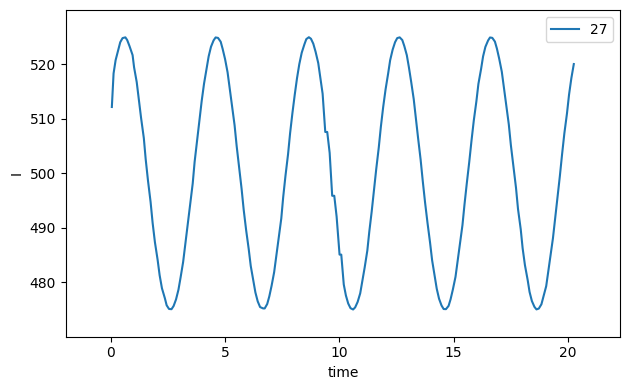

In [26]:
plt.gcf()  # Display a snapshot of the current state of the figure.

In [27]:
plt.figure()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

<Figure size 640x480 with 0 Axes>

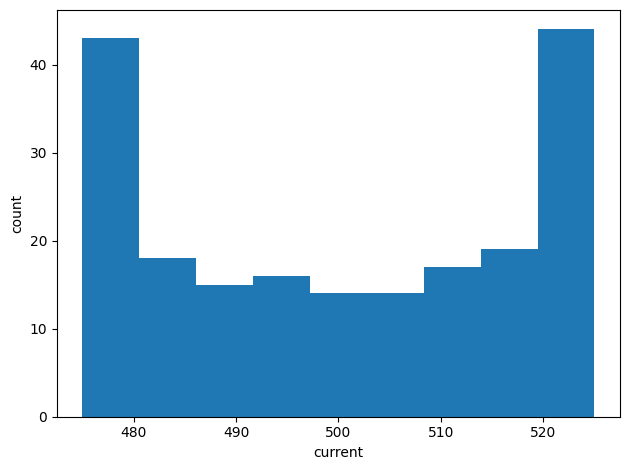

In [28]:
more_current_data = db[-1].table()
plt.hist(more_current_data['I'], bins='auto')
plt.xlabel('current')
plt.ylabel('count')
plt.gcf()

## Exercises

Spend some time reading [10 minutes to pandas](https://pandas.pydata.org/pandas-docs/stable/10min.html), and use this notebook to try some of the examples there.

In [29]:
# Hack away....